In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

In [2]:
file_location = 'https://joannabieri.com/introdatascience/data/lego_sample.csv'
DF = pd.read_csv(file_location)

In [3]:
show(DF)

Loading ITables v2.5.2 from the internet... (need help?)


(a) How many variables and observations are in the data set? ***75 rows by 14 collumns***

(b) What are the names of all the variables? ***'item_number', 'set_name', 'theme', 'pieces', 'price', 'amazon_price',
       'year', 'ages', 'pages', 'minifigures', 
       'packaging', 'weight','unique_pieces', 'size'***

(c) For each variable talk about whether you think that variable is Numerical or Categorical and what type of data it is. 


***'item_number', - Numerical***

***'set_name', - catagorical***

***'theme', - catagorical***

***'pieces', - numerical***

***'price', - numerical***

***'amazon_price', - numerical***

***'year', - numerical***

***'ages', - catagorical***

***'pages', - numerical***
 
***'minifigures', - numerical***

***'packaging', - numerical***

***'weight', - numerical***

***'unique_pieces', - numerical***

***'size' - catagorical***

(d) Use describe to get some basic statistics about the numerical data. Comment on at least four things that you learned by looking at these statistics.

***I learned that all sets come with unique pieces (min of 5)***

***I learned that this is only covering lego sets from the years 2018-2020***

***I learned that there are a couple sets that sqew the number of pages in the books, jumps from 50% with 44 to a mean of 73***

***I learned that not all sets come with minifigures (10 do not)***

In [4]:
#A
DF.describe()

,item_number,pieces,price,amazon_price,year,pages,minifigures,unique_pieces
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,65.000000,75.000000
mean,37498.493333,196.453333,32.136667,39.393733,2019.053333,73.213333,2.615385,96.666667
std,20461.267542,213.914121,27.747263,33.301259,0.820239,76.949842,2.133749,89.471018
min,10859.000000,6.000000,4.990000,6.290000,2018.000000,1.000000,1.000000,5.000000
25%,10916.500000,37.000000,9.990000,17.980000,2018.000000,14.000000,1.000000,30.000000
50%,41378.000000,93.000000,19.990000,29.990000,2019.000000,44.000000,2.000000,61.000000
75%,60193.000000,323.500000,39.990000,53.935000,2020.000000,116.000000,3.000000,151.000000
max,60267.000000,897.000000,149.990000,184.990000,2020.000000,389.000000,15.000000,411.000000


In [5]:
DF.keys()

Index(['item_number', 'set_name', 'theme', 'pieces', 'price', 'amazon_price',
       'year', 'ages', 'pages', 'minifigures', 'packaging', 'weight',
       'unique_pieces', 'size'],
      dtype='object')

In [6]:
dtypes = DF.dtypes
print(dtypes)

item_number        int64
set_name          object
theme             object
pieces             int64
price            float64
amazon_price     float64
year               int64
ages              object
pages              int64
minifigures      float64
packaging         object
weight            object
unique_pieces      int64
size              object
dtype: object


(a) Display (or show) the data frame with only the columns that contain useful categorical information. If you left any columns out say why.

***I wanted a base understanding of the sets and what they contained, I didnt want item numbers because it wont help me understand more, same with the rest that I left off***

    
(b) For each categorical column that you chose above, find the frequencies of the categories. Talk about what you learn from the results of each calculation (1-2 sentences is fine)

***Theme*** Even split 25, 25, 25

***year*** 2020 (27) 2019 (25) 2018 (23)

First it told me that lego makes an even number of themes every year, but looking at the year data it told me that lego doesnt make a set number of sets a year. I now think that its because it was convenient for the data set to have 3 equal catagories.


*Hint - value_counts() on each column independently*

In [7]:
#A
my_var = ['set_name', 'theme', 'pieces', 'price' , 'year', 'minifigures']

DF[my_var].head(10)

,set_name,theme,pieces,price,year,minifigures
0,My First Ladybird,DUPLO®,6,4.99,2018,NaN
1,My First Race Car,DUPLO®,6,4.99,2018,NaN
2,My First Celebration,DUPLO®,41,14.99,2018,NaN
3,Large Playground Brick Box,DUPLO®,71,49.99,2018,2.0
4,Farmers' Market,DUPLO®,26,19.99,2018,3.0
5,Farm Animals,DUPLO®,16,9.99,2018,NaN
6,Train Bridge and Tracks,DUPLO®,26,24.99,2018,1.0
7,Cargo Train,DUPLO®,105,119.99,2018,3.0
8,Spider-Man & Hulk Adventures,DUPLO®,38,29.99,2018,3.0
9,Rapunzel's Tower,DUPLO®,37,29.99,2018,1.0


In [8]:
#B
freq = DF['year'].value_counts()
print(freq)

year
2020    27
2019    25
2018    23
Name: count, dtype: int64


Our goal is to answer the questions:

Do the more expensive sets have more pieces?
What is the most expensive set?
Are there any differences between the themes?


(a) Make a scatter plot of the number of pieces vs the price. Color the data by the lego theme and add the set name as your hover_data.
For help with this one - look at Day3.


Your plot should include labels for the axis and a descriptive title.


(b) Answer the three questions by describing what you see in the graph. Comment on any points that look like outliers.

***Yes, in all catagories the more expensive sets tend to have more pieces, although there are some like the advent calender which had more pieces that usual for a set at that price point.***

***The most expensive set is the Ocean Exploration ship at 149.99 and 745 pieces.***

***DUPLO to me doesnt count because the pieces are so much bigger and therefore have more material in them to allow them to have a larger price. Friends has similar pieces but the minifigures are different, maybe they cost less to produce?***

In [9]:
fig = px.scatter(
    DF,
    x='pieces',
    y='price',
    color='theme',        
    hover_name='set_name',     
    title='Pieces vs Price: Lego Set Exploration', 
)

fig.show()





***Problem 4 (15 points)***


Analyze the price differences between the Retail Price and the Amazon Price.

(a) Create a new column in the data frame that measures the price difference between Amazon and Retail.
Price Difference = Amazon Price - Retail Price
If the results of this calculation are positive, what does that mean about the prices?

***Prices can very depending on where you get them from. Amazon for legos tends to be more expensive, shown by the positives v.s. the negatives which show that the Amazon is less.***

(b) Group the data by Lego Theme and use describe to do statistics on the price difference column you created in part (a). Comment on at least four things that you learned by looking at these statistics.
Your result should be a data frame (or table) with the three Lego themes on the left and statistics about the price difference to the right of that.

***All of the themes tend to be more expensive on amazon, compared to the price. I learned that althought there are some outliers that are much more expensive on amazon, the difference tends to be around ~$7. Friends, the theme with the largest max, also has the largest standard deviation, possibly caused by the large max. Although City has the most expensive sets, they tend to have the most consistant price.***

(c) Make a histogram of the price difference and color the bars by the Lego Theme.
For help with this one - look at Day4.
Your plot should include labels for the axis and a descriptive title.



In [10]:
DF.keys()


Index(['item_number', 'set_name', 'theme', 'pieces', 'price', 'amazon_price',
       'year', 'ages', 'pages', 'minifigures', 'packaging', 'weight',
       'unique_pieces', 'size'],
      dtype='object')

In [11]:
#A
DF['price_difference'] = DF['amazon_price'] - DF['price']
show(DF)

Loading ITables v2.5.2 from the internet... (need help?)


In [12]:
#B
mvar = ['theme', 'price_difference']
group = DF[mvar].groupby('theme').describe()
group

price_difference                                                     
                   count    mean        std    min   25%   50%    75%     max
theme                                                                        
City                25.0  5.3996  15.243677 -13.99 -4.01 -1.00  12.00   39.96
DUPLO®              25.0  7.3924  16.996152  -5.00 -2.00  0.00  11.01   69.00
Friends             25.0  8.9792  24.047927  -9.99 -0.04  3.96   8.94  115.00

In [13]:
fig = px.histogram(DF,
              x='price_difference',
              color='theme',
              opacity=0.5,
              color_discrete_map={'City': 'darkviolet', 
                                       'DUPLO®': 'deeppink', 
                                       'Friends': 'darkturquoise'},
                title='Price difference based on themes', 
                  )
fig.show()

***Problem 5***

The goal of this problem is to explore the price of the Lego sets.

**(a) What was the most expensive set based on Retail price? Show the full data frame information for this observation. Comment on your results comparing Amazon and Retail, number of pieces or minifigs, etc.**

Hint- a mask might help.

**(b) What was the most expensive set based on Amazon price? Show the full data frame information for this observation.**

Hint - a mask might help.

**(c) How many sets were above $100 on either Retail or Amazon? Show the full data frame information for these observations. Comment on any observations for these sets.**

Hint - more masking.

In [14]:
DF.keys()

Index(['item_number', 'set_name', 'theme', 'pieces', 'price', 'amazon_price',
       'year', 'ages', 'pages', 'minifigures', 'packaging', 'weight',
       'unique_pieces', 'size', 'price_difference'],
      dtype='object')

In [15]:
#A
mask = DF['price'] == DF['price'].max()
most_expensive = DF[mask]
most_expensive

,item_number,set_name,theme,pieces,price,amazon_price,year,ages,pages,minifigures,packaging,weight,unique_pieces,size,price_difference
73,60266,Ocean Exploration Ship,City,745,149.99,149.99,2020,Ages_7+,229,8.0,Box,2.28Kg (5.03 lb),314,Small,0.0


In [16]:
#B
mask = DF['amazon_price'] == DF['amazon_price'].max()
most_expensive = DF[mask]
most_expensive

,item_number,set_name,theme,pieces,price,amazon_price,year,ages,pages,minifigures,packaging,weight,unique_pieces,size,price_difference
28,41340,Friendship House,Friends,722,69.99,184.99,2018,Ages_6-12,164,3.0,Box,1.14Kg (2.51 lb),309,Small,115.0


In [17]:
#C
mask = DF['amazon_price'] >= 100
most_expensive = DF[mask]
most_expensive

,item_number,set_name,theme,pieces,price,amazon_price,year,ages,pages,minifigures,packaging,weight,unique_pieces,size,price_difference
7,10875,Cargo Train,DUPLO®,105,119.99,128.95,2018,Ages_2-5,64,3.0,Box,2.86Kg (6.31 lb),68,Large,8.96
28,41340,Friendship House,Friends,722,69.99,184.99,2018,Ages_6-12,164,3.0,Box,1.14Kg (2.51 lb),309,Small,115.00
73,60266,Ocean Exploration Ship,City,745,149.99,149.99,2020,Ages_7+,229,8.0,Box,2.28Kg (5.03 lb),314,Small,0.00


Problem 6 (20 points)


**Below are questions that you should to use the data to find the answer to. Here I am giving you less guidance so you will have to come up with your own way of finding the answer.**

(a) On average is the price of Legos increasing, decreasing, or staying the same over the three years?

***From 2018 to 2019 the average was basically the same, but between 2019 and 2020 it jumped $10, which could be attributed to the inflation over COVID.***


(b) On average are the number of pieces increase, decreasing, or staying the same over the three years?

***On average it was a steady increase from 2018 to 2020, although it could be inflated due to the more sets being put out in 2019 and 2020.***


(c) Which set has the most minifigures and how many sets have zero or an unknown number of minifigures?

***Most: People Pack - Outdoor Adventures (15)***

***How many have zero (no set has 0 minifigures) unknown (NEED HELP HERE)***


Hint - the second question is more challenging that it first appears.

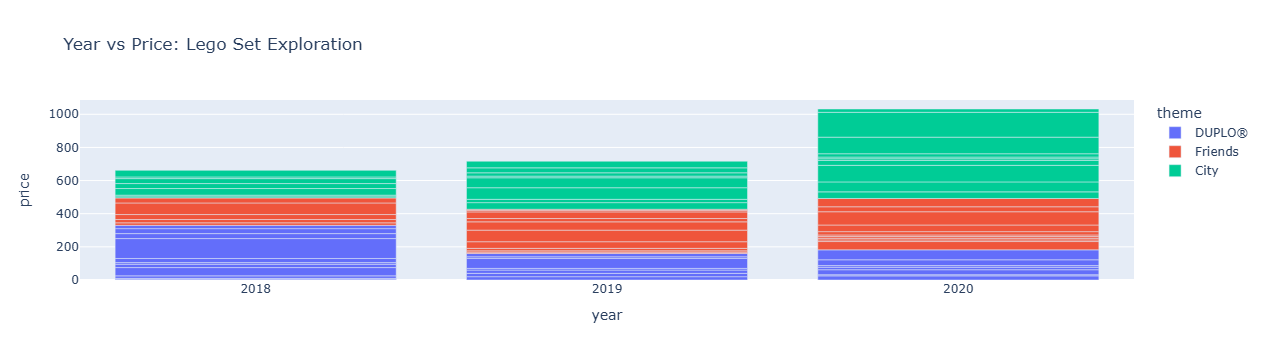

In [23]:
#A
fig = px.bar(
    DF,
    x='year',
    y='price',
    color='theme',        
    hover_name='set_name',     
    title='Year vs Price: Lego Set Exploration', 
)

fig.show()

In [24]:
#A
mvar = ['year', 'price']
group = DF[mvar].groupby('year').describe()
group

price                                                         
     count       mean        std   min    25%    50%    75%     max
year                                                               
2018  23.0  28.772609  25.244183  4.99  12.49  24.99  29.99  119.99
2019  25.0  28.670000  20.225232  7.99   9.99  19.99  39.99   69.99
2020  27.0  38.212222  34.850597  6.99   9.99  29.99  49.99  149.99

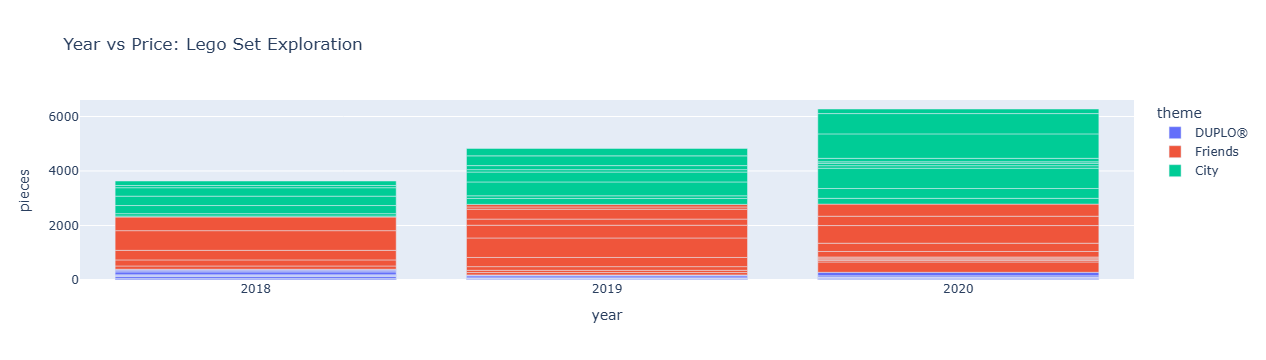

In [25]:
#B
fig = px.bar(
    DF,
    x='year',
    y='pieces',
    color='theme',        
    hover_name='set_name',     
    title='Year vs Price: Lego Set Exploration', 
)

fig.show()

In [26]:
#B
mvar = ['year', 'pieces']
group = DF[mvar].groupby('year').describe()
group

pieces                                                        
      count        mean         std  min   25%    50%    75%    max
year                                                               
2018   23.0  157.913043  185.003910  6.0  31.5   82.0  260.0  722.0
2019   25.0  193.120000  185.911341  9.0  73.0   97.0  337.0  715.0
2020   27.0  232.370370  258.279686  7.0  43.0  126.0  352.5  897.0

In [27]:
#C
mask = DF['minifigures'] == DF['minifigures'].max()
most_expensive = DF[mask]
most_expensive

,item_number,set_name,theme,pieces,price,amazon_price,year,ages,pages,minifigures,packaging,weight,unique_pieces,size,price_difference
56,60202,People Pack - Outdoor Adventures,City,164,39.99,69.99,2018,Ages_5-12,64,15.0,Box,0.29Kg (0.64 lb),128,Small,30.0


Problem 7 (10 points)


**Do an analysis that answers the question below. (free form)**


I want to buy some Legos for my 6 year old cousin, which Lego set is the best deal?

First you will have to describe in words what makes a good deal. Is is price per piece, price per minifig, price per number of unique pieces, price per page, is it some combination of these things? Should you use Retail or Amazon Price?
Then you will have to decide what age ranges are appropriate and select just that data.
Then you will need to do a calculation and add that column to your data frame.
Finally sort your deal column to find the best purchase.
THERE IS NOT ONE CORRECT ANSWER - your answer should be different from everyone else. What I am looking for here is how you are using your data science skills to answer the question and explaining what you are doing.